## I. Preguntas de teoria

Sea el conjunto $S={((1,6),-1),((4,9),-1),((4.6),-1),((5,1),1),((9,5),1),((9,1),1)}$ y un conjunto de hyperplanos $H={H1,H2,H3,H4}$ definidos como $H1:x_1-x_2-1=0, H2: 2x_1-7x_2+32 =0, H3: \sqrt{0.5x_1} - \sqrt{0.5x_2}-\sqrt{0.5}=0, H4: 2x_1-7x_2-32=0$

**1. Grafique**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

#Hyperplanos
def h1(x1, x2):
    return x1-x2-1
def h2(x1, x2):
    return 2*x1-7*x2+32
def h3(x1, x2):
    return np.sqrt(0.5*x1) - np.sqrt(0.5*x2)-np.sqrt(0.5)
def h4(x1, x2):
    return 2*x1-7*x2-32

n = 6 #numero de ejemplos
m = 2 #numero de variables
x_1 = np.array([1,4,4,5,9,9])
x_2 = np.array([6,9,6,1,5,1])
y=np.array([-1,-1,-1,1,1,1])
y=y.reshape(y.shape[0],1)
X=np.array([np.transpose(x_1),np.transpose(x_2)])
X=np.transpose(X)

x1 = np.linspace(X.min()-1, X.max()+1,20)
x2 = np.linspace(X.min()-1, X.max()+1,20)
XX, YY = np.meshgrid(x1, x2)
print('X shape:',X.shape)
print('y shape:',y.shape)
print('X:',X)
print('y:',y)

X shape: (6, 2)
y shape: (6, 1)
X: [[1 6]
 [4 9]
 [4 6]
 [5 1]
 [9 5]
 [9 1]]
y: [[-1]
 [-1]
 [-1]
 [ 1]
 [ 1]
 [ 1]]


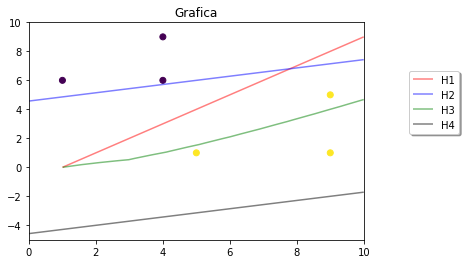

In [3]:
ax = plt.subplot(111)
plt.scatter(X[:,0], X[:,1], c=y[:,0])
plt.title("Grafica")

c1 = ax.contour(XX, YY, h1(XX,YY), levels=[0],colors='red', alpha=0.5)
c2 = ax.contour(XX, YY, h2(XX,YY), levels=[0],colors='blue', alpha=0.5)

y2 = np.linspace(0, X.max()+1,20)
XX, YY = np.meshgrid(x1, y2)
c3 = ax.contour(XX, YY, h3(XX,YY), levels=[0],colors='green', alpha=0.5)

y2 = np.linspace(-5, X.max()+1,20)
XX, YY = np.meshgrid(x1, y2)
c4 = ax.contour(XX, YY, h4(XX,YY), levels=[0],colors='black', alpha=0.5)

lines=[c1.collections[0],c2.collections[0],c3.collections[0],c4.collections[0]]
labels=['H1','H2','H3','H4']
ax.legend(lines,labels,loc='upper right', bbox_to_anchor=(1.3, 0.8), shadow=True, ncol=1)
plt.show()

**2. Encuentre los parametros $w$ y $b$ que definen los hiperplanos y luego determine si son hiperplanos de separacion.**


Sea la ecuacion general de un hiperplano:
$$D(x)= <w,x> + b$$ 
Podemos escribir los hiperplanos de la siguiente manera:

- H1:
$$D(x) = x1-x2-1 = \begin{bmatrix}1 & -1\end{bmatrix}
\begin{bmatrix}x1 \\\ x2\end{bmatrix} - 1$$

$$w_1=\begin{bmatrix}1 \\\ -1\end{bmatrix}, b_1=\begin{bmatrix}-1 \\\ -1\end{bmatrix}$$

- H2:
$$D(x) = 2x1-7x2+32 = \begin{bmatrix}2 & -7\end{bmatrix}
\begin{bmatrix}x1 \\\ x2\end{bmatrix} + 32$$
$$w_2=\begin{bmatrix}2 \\\ -7\end{bmatrix}, b_2=\begin{bmatrix}32 \\\ 32\end{bmatrix}$$

- H3:
$$D(x) = \sqrt{0.5}x1 - \sqrt{0.5}x2-\sqrt{0.5}
=  \begin{bmatrix}\sqrt{0.5} & -\sqrt{0.5}\end{bmatrix} \begin{bmatrix}x1 \\\ x2\end{bmatrix} - \sqrt{0.5}
$$
$$w_3=\begin{bmatrix}\sqrt{0.5} \\\ -\sqrt{0.5}\end{bmatrix}, b_3=\begin{bmatrix}-\sqrt{0.5} \\\ -\sqrt{0.5}\end{bmatrix}$$

- H4:
$$D(x) = 2x1-7x2-32 = \begin{bmatrix}2 & -7\end{bmatrix}
\begin{bmatrix}x1 \\\ x2\end{bmatrix} - 32$$
$$w_4=\begin{bmatrix}2 \\\ -7\end{bmatrix}, b_4=\begin{bmatrix}-32 \\\ -32\end{bmatrix}$$

Para que un hiperplano sea un hyperplano de separacion debe cumplir la siguiente restriccion:

$$y_i(<w,x> + b) \geq 0,  \quad i=1,..,n$$

Dicha restriccion se define en la siguiente funcion.




In [17]:
#funcion que calcula la restriccion de hiperplano de separacion
def restriction(X,b,W,Y):
    r = (np.dot(X,W)+b)
    r = r*Y
    return r


A continuacion evaluaremos los hiperplanos calculando la restriccion para cada uno de ellos.

In [30]:
w1, b1 = np.array([1,-1]),-1 
w1 = w1.reshape(w1.shape[0],1)
w2, b2 = np.array([2,-7]),32 
w2 = w2.reshape(w2.shape[0],1)
w3, b3 = np.array([np.sqrt(0.5),-np.sqrt(0.5)]),-np.sqrt(0.5) 
w3 = w3.reshape(w3.shape[0],1)
w4, b4 = np.array([2,-7]),-32 
w4 = w4.reshape(w4.shape[0],1)           
print('H1: \n',restriction(X,b1,w1,y))
print('H2: \n',restriction(X,b2,w2,y))
print('H3: \n',restriction(X,b3,w3,y))
print('H4: \n',restriction(X,b4,w4,y))

H1: 
 [[6]
 [6]
 [3]
 [3]
 [3]
 [7]]
H2: 
 [[ 8]
 [23]
 [ 2]
 [35]
 [15]
 [43]]
H3: 
 [[4.24264069]
 [4.24264069]
 [2.12132034]
 [2.12132034]
 [2.12132034]
 [4.94974747]]
H4: 
 [[ 72]
 [ 87]
 [ 66]
 [-29]
 [-49]
 [-21]]


Observamos en los resultados anteriores que el hiperplano $H4$ no es un hiperplano de separacion debido a que no cumple la restriccion para los 3 ultimos ejemplos, mientras que los hiperplanos $H1, H2, H3$ si son hiperplanos de separacion.

**3. En el conjunto H, ¿cuantos hiperplanos iguales existen?. En el caso de que existan, ¿cuales son estos?. Fundamente**

**4. Calcule el margen $τ$ para cada hiperplano de separacion. Luego, suponga que el conjunto H contiene al
hiperplano optimo, $H^{*}$, ¿cual serıa $H^{*}$? Fundamente.**

Para resolver esta pregunta sabemos por definicion que el margen de un hyperplano es la distancia minima entre dicho hiperplano y el ejemplo mas cercano. La distancia de cada ejemplo a el hyperplano de define como:
$$\frac{|D({x^i})|}{||w||}$$

La siguiente funcion calcula la distancia minima de los ejemplos de entrenamiento a los hiperplanos. (Solo se calcula los margenes de los hiperplanos de seapracion antes identificados)

In [62]:
##Funcion que calcula el margen de los hiperplanos
def margen():
    m1 = (1/np.linalg.norm(w1))*np.abs((h1(X[:,0],X[:,1])))
    m2 = (1/np.linalg.norm(w2))*np.abs((h2(X[:,0],X[:,1])))
    m3 = (1/np.linalg.norm(w3))*np.abs((h3(X[:,0],X[:,1])))
    
    margenes = {'m1':m1,
               'm2':m2,
               'm3':m3}
    return margenes

In [63]:
m=margen()
print('margen de H1: ',m['m1'])
print('margen de H2: ',m['m2'])
print('margen de H3: ',m['m3'])

margen de H1:  [4.24264069 4.24264069 2.12132034 2.12132034 2.12132034 4.94974747]
margen de H2:  [1.09888451 3.15929297 0.27472113 4.80761974 2.06040846 5.90650425]
margen de H3:  [1.73205081 1.41421356 1.02494403 0.16692527 0.16692527 0.70710678]


Si suponemos que el conjunto de hiperplanos contiene un hiperplano optimo $H^*$ este seria el que tiene el mayor margen. En este caso seria el hiperplano $H1$

**5. ¿Cuales son los vectores de soporte del hiperplano $H^{*}$ escogido en la pregunta anterior?. Fundamente.(No necesita encontrar los valores $α$ )**

Se sabe por teoria que los vectores de soporte al hiperplano optimo son aquellos ejemplos $x^{(i)}$ que cumplen la igualdad:
$$y^{(i)}(<w,x^{(i)}> + b)=1$$ 

In [58]:
def vectores_soporte(X,b,w,y):
    D = restriction(X,b,w,y)
    for i in range(D.shape[0]):
        if D[i]==1:
            print('v1: x%i',i)
    return D

In [72]:
print(vectores_soporte(X,b1,w1,y))
r = np.dot(X,w1)+b1
# r = r*Y–
r
b1
X,X[:,0]-X[:,1],y
# 

[[6]
 [6]
 [3]
 [3]
 [3]
 [7]]


(array([[1, 6],
        [4, 9],
        [4, 6],
        [5, 1],
        [9, 5],
        [9, 1]]), array([-5, -5, -2,  4,  4,  8]), array([[-1],
        [-1],
        [-1],
        [ 1],
        [ 1],
        [ 1]]))

**6. Demuestre la primera condicion KKT, i.e, (Ec. 7 de las diapositivas)**

Sea el conjunto $$N = {((1, 6), −1),((4, 9), −1),((4, 6), −1),((5, 1), 1),((9, 5), 1),((9, 1), 1),((0, 3), 1),((2, 2), −1),
((3, 1), −1)}$$ y el hiperplano $H_1$ definido anteriormente.

**7. Usando cualquier lenguaje de programacion, grafique $N$ y $H_5$.**


**8. Identifique los ejemplos que son separables y los que no lo son, Luego, determine los ejemplos que son clasificados correctamente y los que no.**

**9. Calcule la ... de los ejemplos no separables.**

## II. Preguntas de Investigacion

**10. Explique el significado de la constante C en el termino $\sum_{i=1}E_i$ que se agrega a la funcion objetivo en el caso de ejemplos casi linealmente separables. Luego, explique la influencia de C en la capacidad de generalizacion de una SVM.**


**11. Describa el significado del parametro γ en el kernel gaussiano. Luego, explique la influencia de γ en la capacidad de generalizaci´on de una SVM.**

## III. Implementacion

**12. Usando el Scikit-learn de Python, implemente (comente su codigo) una SVM que clasifique el conjunto de datos ¡por definir¿.**


**13. Experimente y muestre resultados usando diferentes valores para los parametros de los kernels: lineal,polinomial, gaussiano, y el parametro C. Los resultados deben ser mostrados en el documento pdf.**

**14. Dentro de la seccion de Implementacion incluya una subseccion donde indique las instrucciones para ejecutar el codigo.**

In [32]:
ds

NameError: name 'ds' is not defined